# 简单线性回归模型
---

## 简单回归模型的定义

关于 $y$ 和 $x$ 之间关系的一个简单方程

$$y = \beta_{0} + \beta_{1}x + \mu$$

其中 $y$ 为因变量、被解释变量， $x$ 为自变量、解释变量， $\mu$ 为误差项、干扰项， $\beta_{0}$ 为截距参数， $\beta_{1}$ 为斜率参数。

**工资方程**

一个人的工资水平与他的可测教育水平及其他非观测因素的关系为

$$wage=\beta_{0}+\beta_{1}educ +\mu$$

**线性形式**

线性意味着线性于参数，并且意味着不管 $x$ 的初始值为多少，它的任何一单位变化对 $y$ 的影响都是相同的。


### 对于误差项的假设

- 零均值假定 $E(\mu) = 0$ —— 总是成立的
- 零条件均值假定 $E(\mu|x) = E(\mu) = 0$

**讨论**

为什么不直接定义协方差和相关系数为零？

$\mu$ 和 $x$ 不相关，但可能与 $x$ 的函数相关，例如 $x^{2}$ . 例如存在随机变量 $X$ , $Y=X^{2}$ ，对于任何满足 $E(X)=0$ 且 $E(X^{3})=0$ 的随机变量 $X$ ，则有 $Cov(X,Y)=0$ .

**讨论**

假如 $\mu$ 是天生能力，那么 $E(\mu|x) = E(\mu)$ 假定意味着，无论受教育程度如何，能力的平均水平都相同。 例如，若 $E(abil|educ=9)$ 表示所有受过9年教育者的平均能力，$E(abil|educ=16)$ 表示所有受过16年教育者的平均能力，假定则要求两者相等。


## 普通最小二乘法

**样本回归函数**

$$\hat{y}_{i} = \hat{\beta_{0}}+\hat{\beta_{1}}x_{i}$$

**最小化残差平方和**

$$\sum^{n}_{i=1} \hat{\mu}^{2}_{i} = \sum^{n}_{i=1} (y_{i} - \hat{\beta_{0}} - \hat{\beta_{1}}x_{i})^{2}$$

**OLS估计量**

$$\hat{\beta_{1}} = \frac{\sum^{n}_{i=1} (x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum^{n}_{i=1} (x_{i}-\bar{x})^{2}}$$

$$\hat{\beta_{0}} = \bar{y} - \hat{\beta_{1}}\bar{x}$$

**斜率估计值**

$$\Delta \hat{y} = \hat{\beta}_{1} \Delta x$$

它告诉我们 $\hat{y}$ 在 $x$ 变化一个单位时的变化量。

<div align=center>
<img src="./pic/w001.jpg" width = "50%" />
</div>

** 例：CEO的薪水和股本回报率**

In [1]:
import ipystata

In [3]:
%%stata

cd "E:\cyberspace\notebook\Courses\Graduate\Econometrics\data"

E:\cyberspace\notebook\Courses\Graduate\Econometrics\data



In [4]:
%%stata

use CEOSAL1, clear
su salary roe


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      salary |        209     1281.12    1372.345        223      14822
         roe |        209    17.18421    8.518509         .5       56.3



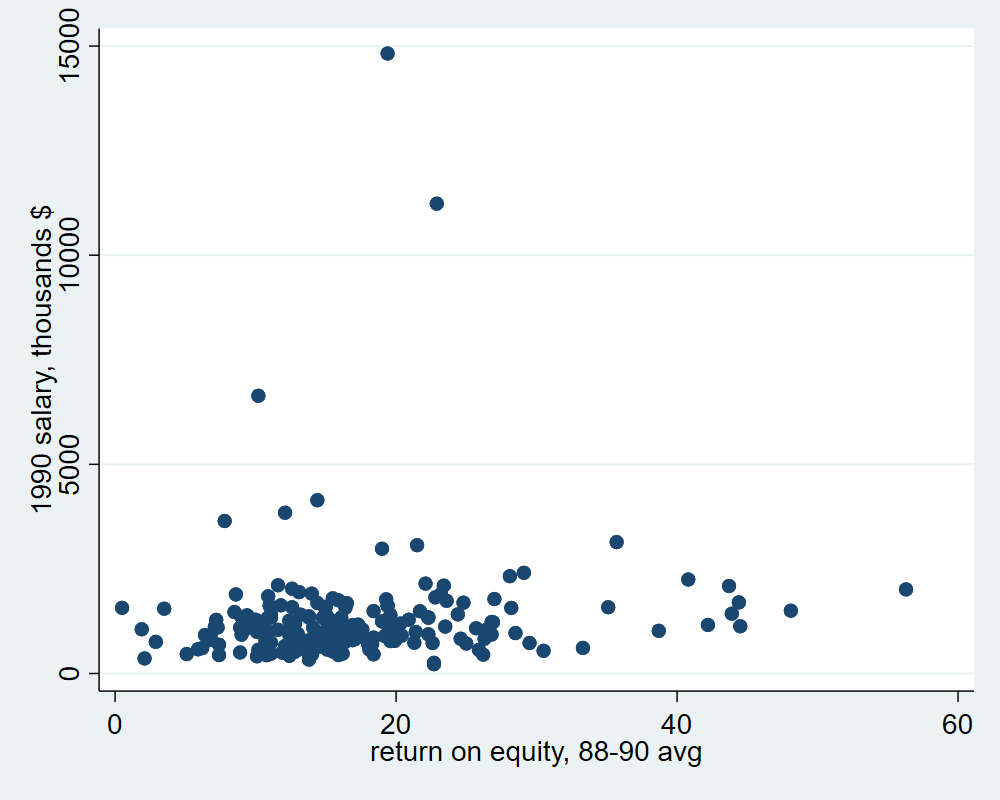

In [5]:
%%stata

twoway scatter salary roe

In [6]:
%%stata

reg salary roe


      Source |       SS           df       MS      Number of obs   =       209
-------------+----------------------------------   F(1, 207)       =      2.77
       Model |  5166419.04         1  5166419.04   Prob > F        =    0.0978
    Residual |   386566563       207  1867471.32   R-squared       =    0.0132
-------------+----------------------------------   Adj R-squared   =    0.0084
       Total |   391732982       208  1883331.64   Root MSE        =    1366.6

------------------------------------------------------------------------------
      salary |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         roe |   18.50119   11.12325     1.66   0.098    -3.428196    40.43057
       _cons |   963.1913   213.2403     4.52   0.000     542.7902    1383.592
------------------------------------------------------------------------------



In [7]:
%%stata

*Salary for ROE = 0
display _b[roe]*0+_b[_cons]

963.19134



In [8]:
%%stata

*Salary for ROE = 30
display _b[roe]*30+_b[_cons]

1518.2269



## OLS性质

### 拟合值和残差

In [9]:
%%stata

predict salaryhat, xb
predict uhat, resid

list roe salary salaryhat uhat in 1/10


     +--------------------------------------+
     |  roe   salary   salary~t        uhat |
     |--------------------------------------|
  1. | 14.1     1095   1224.058   -129.0581 |
  2. | 10.9     1001   1164.854   -163.8543 |
  3. | 23.5     1122   1397.969   -275.9692 |
  4. |  5.9      578   1072.348   -494.3483 |
  5. | 13.8     1368   1218.508    149.4923 |
     |--------------------------------------|
  6. |   20     1145   1333.215   -188.2151 |
  7. | 16.4     1078   1266.611   -188.6108 |
  8. | 16.3     1094   1264.761   -170.7607 |
  9. | 10.5     1237   1157.454     79.5462 |
 10. | 26.3      833   1449.773   -616.7725 |
     +--------------------------------------+



### OLS统计量的代数性质

- OLS残差和及其样本均值都为零 $\sum_{i=1}^{n} \hat{\mu}_{i} = 0$
- 回归元和OLS残差的样本协方差为零 $\sum_{i=1}^{n} x_{i} \hat{\mu}_{i} = 0$
- 点 $(\bar{x}, \bar{y})$ 总在OLS回归线上

## 拟合优度

拟合优度是 $y$ 的样本波动中被 $x$ 解释的部分，用于概括OLS回归线对数据拟合得有多好，它的取值范围为0和1之间。

$$R^{2} \equiv SSE/SST \equiv 1 - SSR/SST$$

其中

总平方和(SST) $SST \equiv \sum^{n}_{i=1} (y_{i}-\bar{y})^{2}$

解释平方和(SSE) $SSE \equiv \sum^{n}_{i=1} (\hat{y_{i}}-\bar{y})^{2}$

残差平方和(SSR) $SSR \equiv \sum^{n}_{i=1} \hat{\mu}_{i}^{2}$

它们符合 $SST = SSE + SSR$

**讨论**

在什么情况下 $R^{2}=1$ ？

## 度量单位和函数形式

### 改变度量单位对OLS统计量的影响

- 因变量的度量单位发生变化
- 自变量的度量单位发生变化

** 例：CEO的薪水和股本回报率**

假设不用千美元而是用美元来作为年薪单位

In [11]:
%%stata

gen salardol = 1000 * salary
list salary salardol in 1/10


     +-------------------+
     | salary   salardol |
     |-------------------|
  1. |   1095    1095000 |
  2. |   1001    1001000 |
  3. |   1122    1122000 |
  4. |    578     578000 |
  5. |   1368    1368000 |
     |-------------------|
  6. |   1145    1145000 |
  7. |   1078    1078000 |
  8. |   1094    1094000 |
  9. |   1237    1237000 |
 10. |    833     833000 |
     +-------------------+



In [15]:
%%stata

gen roedec = roe/100
list roe roedec in 1/10


     +---------------+
     |  roe   roedec |
     |---------------|
  1. | 14.1     .141 |
  2. | 10.9     .109 |
  3. | 23.5     .235 |
  4. |  5.9     .059 |
  5. | 13.8     .138 |
     |---------------|
  6. |   20       .2 |
  7. | 16.4     .164 |
  8. | 16.3     .163 |
  9. | 10.5     .105 |
 10. | 26.3     .263 |
     +---------------+



In [17]:
%%stata

eststo clear
eststo: quietly reg salary roe
eststo: quietly reg salardol roe
eststo: quietly reg salary roedec
eststo: quietly reg salardol roedec
esttab, se r2


(est1 stored)

(est2 stored)

(est3 stored)

(est4 stored)

----------------------------------------------------------------------------
                      (1)             (2)             (3)             (4)   
                   salary        salardol          salary        salardol   
----------------------------------------------------------------------------
roe                 18.50         18501.2                                   
                  (11.12)       (11123.3)                                   

roedec                                             1850.1       1850118.6   
                                                 (1112.3)     (1112325.1)   

_cons               963.2***     963191.3***        963.2***     963191.3***
                  (213.2)      (213240.3)         (213.2)      (213240.3)   
----------------------------------------------------------------------------
N                     209             209             209             209   
R-sq         

### 在简单回归中加入非线性因素

**例子：一个对数工资方程**

<div align=center>
<img src="./pic/w002.jpg" width = "40%" />
</div>

In [21]:
%%stata

use ./wage1, clear

reg lwage educ


      Source |       SS           df       MS      Number of obs   =       526
-------------+----------------------------------   F(1, 524)       =    119.58
       Model |  27.5606288         1  27.5606288   Prob > F        =    0.0000
    Residual |  120.769123       524  .230475425   R-squared       =    0.1858
-------------+----------------------------------   Adj R-squared   =    0.1843
       Total |  148.329751       525   .28253286   Root MSE        =    .48008

------------------------------------------------------------------------------
       lwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |   .0827444   .0075667    10.94   0.000     .0678796    .0976091
       _cons |   .5837727   .0973358     6.00   0.000     .3925563    .7749891
------------------------------------------------------------------------------



则教育对于工资的影响为

$$\beta_{1}=\frac{\Delta \log (\text {wage})}{\Delta educ}=\frac{1}{wage} \cdot \frac{\Delta wage}{\Delta educ} = \frac{\frac{\Delta \text { wage }}{\text { wage }}}{\Delta educ}$$



**含对数的函数形式总览**

<div align=center>
<img src="./pic/w003.jpg" width = "70%" />
</div>

## OLS估计量的期望值和方差

### 简单线性回归（SLR）的假定

- SLR.1 线性于参数
- SLR.2 随机抽样
- SLR.3 解释变量的样本有波动，即 $x$ 的样本不是完全相同的数值
- SLR.4 零条件均值 $E(\mu|x) = 0$
- SLR.5 同方差性 $Var(\mu|x) = \sigma^{2}$

**一个工资方程的异方差性**

<div align=center>
<img src="./pic/w004.jpg" width = "50%" />
</div>

### OLS的无偏性

利用假定SLR.1至SLR.4，对 $\beta_{0}$ 和 $\beta_{1}$ 的任何值，我们都有

$$E(\hat{\beta_{0}}) = \beta_{0},E(\hat{\beta_{1}}) = \beta_{1}$$

### OLS估计量的抽样方差

在假定SLR.1至SLR.5下，以样本值 $\{x_{1},x_{2},...,x_{n}\}$ 为条件，有

$$Var(\hat{\beta_{1}}) = \frac{\sigma^{2}}{\sum^{n}_{i=1} (x_{i}-\bar{x})^{2}} = \sigma^{2} / SST_{x}$$

** $\sigma^{2}$ 的无偏估计**

若回归标准误（SER）

$$\hat{\sigma}^{2}=\frac{1}{(n-2)} \sum_{i=1}^{n} \hat{u}_{i}^{2}=\operatorname{SSR} /(n-2)$$

在假定SLR.1至SLR.5下，有

$$ E(\hat{\sigma^{2}}) = \sigma^{2}$$

## 过原点回归及对常数回归

**讨论**

过原点回归的OLS估计量和一般回归模型中的OLS估计量有何区别？